In [137]:
## VAE 
## Run this code to obtain a csv file
## Use the CSV file to run in the main code to obtain accuracy and graphs
from numpy import vstack
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import time

In [138]:
#import data
data=pd.read_csv('C:/Users/abhij/OneDrive/Documents/Pytorch/MLparameters_normalized.csv',header=None)
data=pd.read_csv('C:/Users/abhij/OneDrive/Documents/Pytorch/parameters1.csv')


In [139]:
data

,ID,VF,NO,MEAN,STD,AR,TC,DC,HP
0,2,0.1968,12,0.37,0.07,2.8299,0.530665,7.416923,241.8
1,3,0.0977,11,0.21,0.04,1.2510,0.398369,6.057783,261.1
2,4,0.1901,12,0.01,0.13,2.9024,0.518417,7.322267,249.9
3,5,0.1163,11,0.36,0.05,1.8492,0.423501,6.312040,259.9
4,8,0.1533,12,0.37,0.11,1.1920,0.464671,6.778300,252.5
...,...,...,...,...,...,...,...,...,...
995,6251,0.0124,10,0.10,0.00,2.2562,0.301519,5.034480,281.0
996,6285,0.0126,10,0.13,0.01,2.7862,0.301675,5.036163,281.0
997,6459,0.0125,10,0.14,0.02,1.0481,0.301312,5.034010,281.0
998,6641,0.0104,10,0.16,0.01,2.5738,0.299664,5.012640,280.9


In [140]:
class2idx = {
    10:0,
    11:1,
    12:2,
    13:3,
}

idx2class = {v: k for k, v in class2idx.items()}

data['NO'].replace(class2idx, inplace=True)

In [141]:
#Inputs
x = data.iloc[:,1:6].values
x=np.array(x)
x=x.astype(np.float32)  # Have to be converted to float else an error will pop up
#sc=StandardScaler()
#x=sc.fit_transform(x)

In [142]:
x

array([[0.1968, 2.    , 0.37  , 0.07  , 2.8299],
       [0.0977, 1.    , 0.21  , 0.04  , 1.251 ],
       [0.1901, 2.    , 0.01  , 0.13  , 2.9024],
       ...,
       [0.0125, 0.    , 0.14  , 0.02  , 1.0481],
       [0.0104, 0.    , 0.16  , 0.01  , 2.5738],
       [0.015 , 0.    , 0.1   , 0.01  , 2.7404]], dtype=float32)

In [143]:
y = data.iloc[:,6:9].values
y=np.array(y)
y=y.astype(np.float32)
#y=sc.fit_transform(y)

In [144]:
y

array([[  0.530665,   7.416923, 241.8     ],
       [  0.398369,   6.057783, 261.1     ],
       [  0.518417,   7.322267, 249.9     ],
       ...,
       [  0.301312,   5.03401 , 281.      ],
       [  0.299664,   5.01264 , 280.9     ],
       [  0.303946,   5.0626  , 279.8     ]], dtype=float32)

In [145]:
input_train, input_test, output_train, output_test = train_test_split(x,y,test_size = 0.2,random_state=42) 

In [146]:
#Train set is converted to tensor form
inputs_train = torch.from_numpy(input_train)
outputs_train = torch.from_numpy(output_train)
new_shape = (len(output_train), 3)
outputs_train = outputs_train.view(new_shape)
print(outputs_train.shape)

torch.Size([800, 3])


In [147]:
f = torch.nn.BatchNorm1d(5)
inputs_train=f(inputs_train)
inputs_train

tensor([[-1.5722, -1.5561, -1.1607, -0.7979, -1.2547],
        [ 1.1050,  0.5291,  1.3400,  0.0351,  0.5634],
        [ 0.8968,  0.5291,  2.9145,  0.4517, -1.1480],
        ...,
        [-1.5433, -1.5561, -1.3460, -0.7979,  0.9212],
        [ 0.0769,  0.5291,  0.4138, -0.5896, -1.3572],
        [-1.4312, -1.5561, -1.2534, -0.7979, -0.1126]],
       grad_fn=<NativeBatchNormBackward>)

In [148]:
f1 = torch.nn.BatchNorm1d(3)
outputs_train=f1(outputs_train)
outputs_train

tensor([[-1.3652, -1.4535,  1.6009],
        [ 1.0465,  1.1047, -1.2184],
        [ 0.7384,  0.8270, -0.7548],
        ...,
        [-1.3444, -1.4300,  1.5369],
        [-0.0484, -0.0088,  0.0073],
        [-1.2740, -1.3431,  1.4676]], grad_fn=<NativeBatchNormBackward>)

In [149]:
#Test set is converted to tensor form
inputs_test = torch.from_numpy(input_test)
outputs_test = torch.from_numpy(output_test)
new_shape = (len(output_test), 3)
outputs_test = outputs_test.view(new_shape)
print(outputs_test.shape)

torch.Size([200, 3])


In [150]:
f2 = torch.nn.BatchNorm1d(3)
outputs_test=f2(outputs_test)
outputs_test

tensor([[-0.9583, -0.9782,  1.0726],
        [ 1.0373,  1.0733, -1.0720],
        [ 1.0532,  1.1101, -1.4167],
        [ 0.8290,  0.7889, -1.1541],
        [ 0.2219,  0.1962, -0.3389],
        [ 0.7778,  0.8177, -0.7492],
        [ 1.4038,  1.4049, -1.5863],
        [ 0.6505,  0.6643, -0.6179],
        [-1.3859, -1.4695,  1.5704],
        [-1.1240, -1.1533,  1.2039],
        [ 1.9036,  1.7751, -1.5753],
        [-0.3852, -0.3411,  0.3012],
        [ 1.5472,  1.4615, -1.4495],
        [ 0.1031,  0.1564, -0.3115],
        [ 0.8889,  0.9630, -0.9845],
        [-0.7385, -0.7086,  0.6349],
        [-0.6770, -0.6383,  0.6623],
        [-0.6871, -0.6864,  0.6021],
        [ 1.2810,  1.2391, -1.1978],
        [ 0.0388,  0.0805, -0.3170],
        [-0.4639, -0.3870,  0.4106],
        [-0.0891, -0.0221, -0.3444],
        [-0.9474, -0.9558,  0.9796],
        [ 1.5198,  1.4219, -1.0556],
        [-0.6563, -0.6115,  0.5146],
        [-1.0589, -1.0777,  1.0617],
        [-0.4224, -0.3986,  0.4599],
 

In [151]:
f3 = torch.nn.BatchNorm1d(5)
inputs_test=f3(inputs_test)
inputs_test

tensor([[-9.8106e-01, -5.3151e-01, -2.3354e+00,  2.0687e+00,  1.1270e+00],
        [ 1.1034e+00,  5.5320e-01, -4.2195e-02,  2.5051e-01, -1.6655e+00],
        [ 1.1093e+00,  5.5320e-01,  1.0585e+00, -3.5556e-01,  1.1565e+00],
        [ 8.0631e-01,  5.5320e-01, -2.2565e-01, -3.5556e-01,  7.7972e-01],
        [ 2.4157e-01,  5.5320e-01,  3.2472e-01, -7.5960e-01,  1.1248e+00],
        [ 8.4875e-01,  5.5320e-01, -4.2195e-02, -5.5758e-01,  1.2437e+00],
        [ 1.3498e+00,  1.6379e+00, -7.7602e-01, -5.5758e-01, -1.7765e+00],
        [ 7.1435e-01,  5.5320e-01, -5.9256e-01,  6.5455e-01,  6.0275e-01],
        [-1.5859e+00, -1.6162e+00, -1.1429e+00, -7.5960e-01,  1.0388e-01],
        [-1.1874e+00, -1.6162e+00,  4.9534e-02, -3.5556e-01, -1.0343e+00],
        [ 1.6351e+00,  1.6379e+00,  8.7509e-01, -3.5556e-01, -5.7046e-01],
        [-2.6894e-01, -5.3151e-01, -4.2195e-02, -3.5556e-01,  7.0800e-01],
        [ 1.3522e+00,  1.6379e+00, -4.2195e-02,  1.0586e+00, -1.4431e-01],
        [ 2.2860e-01,  5.

In [152]:
train_set = TensorDataset(inputs_train, outputs_train)
test_set = TensorDataset(inputs_test, outputs_test)

In [153]:
train_data = DataLoader(train_set, 800, shuffle=True)
test_data = DataLoader(test_set, batch_size = 200, shuffle = True)

In [154]:
# Creating a PyTorch class
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Building an linear encoder with Linear
        self.encoder = torch.nn.Sequential(
            #torch.nn.Linear(5,40),
            #torch.nn.ReLU(), # Activation function
            torch.nn.Linear(5,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40, 40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,3)
        )
          
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(3,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40,40),
            torch.nn.ReLU(), # Activation function
            torch.nn.Linear(40, 5),
            #torch.nn.ReLU(), # Activation function
            #torch.nn.Linear(40, 5)
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return (encoded, decoded)
    
    def decoderf(self, y):
        return self.decoder(y) # return x !

In [155]:
# Model Initialization
model = AE()
  
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,betas=(0.9, 0.99),eps=1e-08)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [164]:
##Model training

In [156]:
def fit(number_epochs, model, loss_function, optimizer):
    loss_list_train = []
    loss_list_test=[]
    #correct_val=0
    for epoch in range(number_epochs):
        for x1,y1 in train_data:
            # Generate predictions
            predict = model(Variable(x1))
            loss = loss_function(predict[1], Variable(x1))+loss_function(predict[0], Variable(y1))
            # Perform gradient descent
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #correct_val += (predict == y1).float().sum()
            if(epoch % 50 == 0):
                print('epoch {}, loss {}'.format(epoch, loss.data))
                length=0
                for x2, y2 in test_data:

                    #test = Variable(x2)
                    predict_test = model(Variable(x2))
                    loss_test = loss_function(predict_test[1],Variable(x2))+loss_function(predict_test[0],Variable(y2))
                loss_list_test.append(loss_test.data)
        loss_list_train.append(loss.data)
        #accuracy = 100 * correct_val / len(train_data)
        #print("Accuracy = {}".format(accuracy))
    print('Test loss: ', loss_function(predict_test[0], Variable(y2))+loss_function(predict_test[1],Variable(x2)))
    print('Training loss: ', loss_function(predict[0], y1)+loss_function(predict[1], x1))
    
    
    plt.plot(range(epoch+1),loss_list_train)
    #plt.ylim([0,0.05])
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()

epoch 0, loss 2.0082268714904785
epoch 50, loss 0.8054810166358948
epoch 100, loss 0.5463403463363647
epoch 150, loss 0.5346155762672424
epoch 200, loss 0.5315331220626831
epoch 250, loss 0.5296036005020142
epoch 300, loss 0.5255956053733826
epoch 350, loss 0.4194888472557068
epoch 400, loss 0.2586972713470459
epoch 450, loss 0.22637614607810974
epoch 500, loss 0.20326150953769684
epoch 550, loss 0.1880142241716385
epoch 600, loss 0.1780226230621338
epoch 650, loss 0.1675979197025299
epoch 700, loss 0.1624775379896164
epoch 750, loss 0.1561896950006485
epoch 800, loss 0.15127326548099518
epoch 850, loss 0.1483539640903473
epoch 900, loss 0.15093784034252167
epoch 950, loss 0.14081068336963654
epoch 1000, loss 0.1384430229663849
epoch 1050, loss 0.13428331911563873
epoch 1100, loss 0.13414326310157776
epoch 1150, loss 0.1326524168252945
epoch 1200, loss 0.12721721827983856
epoch 1250, loss 0.12648352980613708
epoch 1300, loss 0.12359809130430222
epoch 1350, loss 0.122231625020504
epoch 

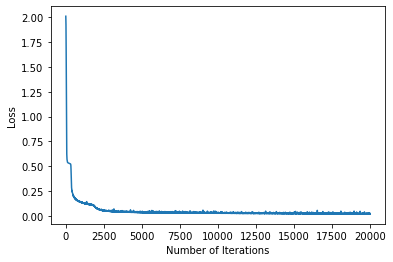

Execution time in seconds: 302.73704409599304


In [157]:
#Run a few thousand epochs
startTime = time.time()
fit(20000, model, loss_function, optimizer)
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

In [158]:
#model evaluation
model.eval()
pred=model.decoderf(outputs_test)
pred

tensor([[-1.0252e+00, -4.3986e-01, -1.3202e+00, -7.0346e-01,  1.3075e+00],
        [ 1.0221e+00,  4.9523e-01,  1.9759e+00,  2.1451e-01,  1.1189e+00],
        [ 1.1967e+00,  1.5939e+00,  1.5728e+00,  7.4317e+00,  3.3609e-01],
        [ 9.6831e-01,  5.3739e-01,  4.0045e-01,  7.9877e+00, -5.9388e-01],
        [ 3.2540e-01,  5.1054e-01, -7.9497e-01, -3.1150e-01,  8.9590e-01],
        [ 8.6107e-01,  5.2504e-01,  2.2449e-01, -4.7256e-01, -1.0910e+00],
        [ 1.3910e+00,  1.5641e+00,  1.8380e+00,  5.5165e+00,  2.2911e-01],
        [ 7.2680e-01,  5.1228e-01, -2.6200e-01, -7.0122e-01, -1.0970e+00],
        [-1.6057e+00, -1.5589e+00, -1.2490e+00, -7.2118e-01, -1.8091e-01],
        [-1.1552e+00, -1.4483e+00, -4.8343e-01, -5.1663e-01, -1.1388e-01],
        [ 1.6540e+00,  1.5786e+00, -4.1072e-01, -5.3821e-01,  3.6446e-01],
        [-2.7788e-01, -5.0517e-01, -6.4606e-01, -6.5262e-01,  1.2391e+00],
        [ 1.3752e+00,  1.5826e+00,  9.4154e-01,  1.2419e+00,  6.7529e-01],
        [ 2.4549e-01,  5.

In [159]:
inputs_test

tensor([[-9.8106e-01, -5.3151e-01, -2.3354e+00,  2.0687e+00,  1.1270e+00],
        [ 1.1034e+00,  5.5320e-01, -4.2195e-02,  2.5051e-01, -1.6655e+00],
        [ 1.1093e+00,  5.5320e-01,  1.0585e+00, -3.5556e-01,  1.1565e+00],
        [ 8.0631e-01,  5.5320e-01, -2.2565e-01, -3.5556e-01,  7.7972e-01],
        [ 2.4157e-01,  5.5320e-01,  3.2472e-01, -7.5960e-01,  1.1248e+00],
        [ 8.4875e-01,  5.5320e-01, -4.2195e-02, -5.5758e-01,  1.2437e+00],
        [ 1.3498e+00,  1.6379e+00, -7.7602e-01, -5.5758e-01, -1.7765e+00],
        [ 7.1435e-01,  5.5320e-01, -5.9256e-01,  6.5455e-01,  6.0275e-01],
        [-1.5859e+00, -1.6162e+00, -1.1429e+00, -7.5960e-01,  1.0388e-01],
        [-1.1874e+00, -1.6162e+00,  4.9534e-02, -3.5556e-01, -1.0343e+00],
        [ 1.6351e+00,  1.6379e+00,  8.7509e-01, -3.5556e-01, -5.7046e-01],
        [-2.6894e-01, -5.3151e-01, -4.2195e-02, -3.5556e-01,  7.0800e-01],
        [ 1.3522e+00,  1.6379e+00, -4.2195e-02,  1.0586e+00, -1.4431e-01],
        [ 2.2860e-01,  5.

In [160]:
pred

tensor([[-1.0252e+00, -4.3986e-01, -1.3202e+00, -7.0346e-01,  1.3075e+00],
        [ 1.0221e+00,  4.9523e-01,  1.9759e+00,  2.1451e-01,  1.1189e+00],
        [ 1.1967e+00,  1.5939e+00,  1.5728e+00,  7.4317e+00,  3.3609e-01],
        [ 9.6831e-01,  5.3739e-01,  4.0045e-01,  7.9877e+00, -5.9388e-01],
        [ 3.2540e-01,  5.1054e-01, -7.9497e-01, -3.1150e-01,  8.9590e-01],
        [ 8.6107e-01,  5.2504e-01,  2.2449e-01, -4.7256e-01, -1.0910e+00],
        [ 1.3910e+00,  1.5641e+00,  1.8380e+00,  5.5165e+00,  2.2911e-01],
        [ 7.2680e-01,  5.1228e-01, -2.6200e-01, -7.0122e-01, -1.0970e+00],
        [-1.6057e+00, -1.5589e+00, -1.2490e+00, -7.2118e-01, -1.8091e-01],
        [-1.1552e+00, -1.4483e+00, -4.8343e-01, -5.1663e-01, -1.1388e-01],
        [ 1.6540e+00,  1.5786e+00, -4.1072e-01, -5.3821e-01,  3.6446e-01],
        [-2.7788e-01, -5.0517e-01, -6.4606e-01, -6.5262e-01,  1.2391e+00],
        [ 1.3752e+00,  1.5826e+00,  9.4154e-01,  1.2419e+00,  6.7529e-01],
        [ 2.4549e-01,  5.

In [161]:
len(pred)

200

In [163]:
np.savetxt('vae_data.csv',pred.detach().numpy(), fmt = '%f', delimiter=",")  